In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys, os


root = os.path.dirname(os.getcwd())
sys.path.insert(0, root)

In [2]:
from pymoo.model.algorithm import filter_optimum


def get(hist):

    evals = []
    F = []

    for algorithm in history:
        best = filter_optimum(algorithm.pop, least_infeasible=True)
        F.append(best.F[0])
        evals.append(algorithm.evaluator.n_eval)

    return np.array(evals), np.array(F)

    

In [14]:
import pickle, traceback
from pymoo.model.population import Population
from iscso19.methods.restarts import MyGeneticAlgorithm, RestartDisplay
from iscso19.methods.restarts_nds import MyGeneticAlgorithm, RestartDisplay, MySurvival
from pymoo.model.problem import Problem


data = {}

for k in range(0, 600):
    folder = os.path.join(root, "results", "restarts_nds")
    fname = "restarts_nds_%s" % k
    
    print(fname, end=" ")

    try:
        
        history = np.load(os.path.join(folder, fname + ".npy"), allow_pickle=True)
        hist_evals, hist_F = get(history)
        
        
        X = np.loadtxt(os.path.join(folder, fname + ".x"))
        F = np.loadtxt(os.path.join(folder, fname + ".f"))[:, None]
        G = np.loadtxt(os.path.join(folder, fname + ".g"))
        

        pop = Population().new("X", X, "F", F, "G", G)
        pop.set("CV", Problem.calc_constraint_violation(pop.get("G")))
        pop.set("feasible",  pop.get("CV") <= 0)
        
        best = filter_optimum(pop, least_infeasible=True)
        
        
        data[fname] = {
            "algorithm" : history[-1],
            "F" : best.F[0],
            "G" : best.G,
            "X" : best.X,
            "hist_F" : hist_F,
            "hist_evals" : hist_evals, 
        }
        
    except Exception as err:
        print("ERROR", end=" ")
#         print(err)
#         print(traceback.format_exc())
        continue
    

    

restarts_nds_0 restarts_nds_1 restarts_nds_2 restarts_nds_3 restarts_nds_4 restarts_nds_5 restarts_nds_6 restarts_nds_7 restarts_nds_8 restarts_nds_9 restarts_nds_10 restarts_nds_11 restarts_nds_12 restarts_nds_13 restarts_nds_14 restarts_nds_15 restarts_nds_16 restarts_nds_17 restarts_nds_18 restarts_nds_19 restarts_nds_20 restarts_nds_21 restarts_nds_22 restarts_nds_23 restarts_nds_24 restarts_nds_25 restarts_nds_26 restarts_nds_27 ERROR restarts_nds_28 restarts_nds_29 restarts_nds_30 restarts_nds_31 restarts_nds_32 restarts_nds_33 restarts_nds_34 restarts_nds_35 restarts_nds_36 restarts_nds_37 restarts_nds_38 restarts_nds_39 restarts_nds_40 restarts_nds_41 restarts_nds_42 restarts_nds_43 restarts_nds_44 restarts_nds_45 restarts_nds_46 restarts_nds_47 restarts_nds_48 restarts_nds_49 restarts_nds_50 restarts_nds_51 restarts_nds_52 restarts_nds_53 restarts_nds_54 restarts_nds_55 restarts_nds_56 restarts_nds_57 restarts_nds_58 restarts_nds_59 restarts_nds_60 restarts_nds_61 restarts_nds

In [15]:
keys = list(data.keys())
res = np.array([data[k]["F"].min() for k in keys])
top = [keys[i] for i in res.argsort()[:5]]

restarts_nds_310
F (best) 15977.091881320672
X (best) [   28    19    23    14    16    26    19    22    24    31    19    28
    21    24    14    24    23    27    26    18    18    13    13    17
    25    20    19    23    26    20    19    20    19    12    11    15
    17    18    20     9    11    14    13    24    14    19    15    12
    13    13    12    14    13    14    15    13    12     4    14    13
    14     1    13     1    14    18    14    20    10    14     4     7
    24    29    25    18    11    12    28    22    26    27    32    25
    26    27    22    16    23    25    25    17    15    14     8    16
    22    18    26    27    25    23    25    19    21    22    15    13
    13    16    17    22     8    10    13     7    18     9    14    14
    12    13    13    13    13     1    13    14    13    14     8    15
    15    14    11    13    11    15    19    14    20    12    15     7
    11    19     1    13     8    13     8    11    19    14    25    

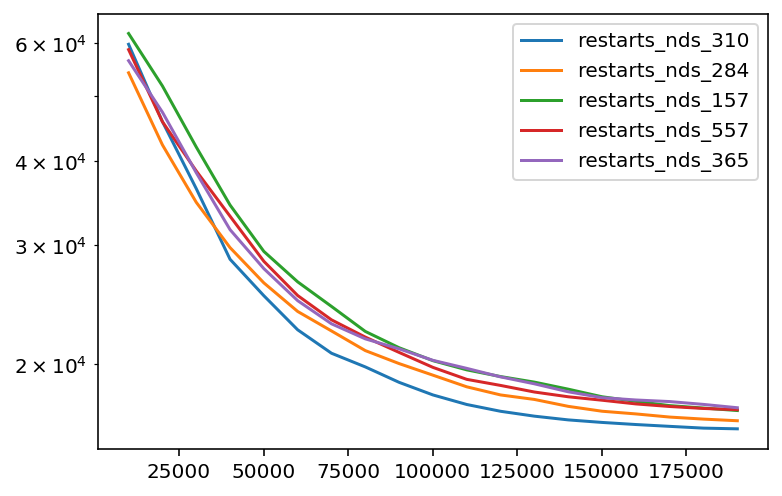

In [16]:

for fname in top:
    
    val = data[fname]
    
    X, F, G, hist_F, hist_evals, algorithm = val["X"], val["F"], val["G"], val["hist_F"], val["hist_evals"], val["algorithm"]
    
    
    print(fname)
    print("F (best)", F)
    print("X (best)", X.astype(np.int))
    print("=" * 30)
    
    
#     plt.plot(evals[feas:feas+100], F[feas:feas+100], label=str(k))
    
    plt.plot(hist_evals, hist_F, label=fname)
    
plt.yscale("log")
plt.legend()
plt.show()

    

In [8]:
data = {}

for k in range(100):
    folder = os.path.join(root, "results", "cmaes")
    
    fname = "cmaes_%s" % k
    
    try:
        
        print(fname, end=" ")
        
        F = np.loadtxt(os.path.join(folder, "cmaes_%s.%s" % (k, "f")))
        G = np.loadtxt(os.path.join(folder, "cmaes_%s.%s" % (k, "g")))
        X = np.loadtxt(os.path.join(folder, "cmaes_%s.%s" % (k, "x")))
        
        data[fname] = {
            "F" : np.atleast_2d(F),
            "G" : G,
            "X" : X
            
        }
        
    except Exception as e:
        print(e)
        continue
    



cmaes_0 cmaes_1 cmaes_2 cmaes_3 cmaes_4 cmaes_5 cmaes_6 cmaes_7 cmaes_8 cmaes_9 cmaes_10 cmaes_11 cmaes_12 cmaes_13 cmaes_14 cmaes_15 cmaes_16 cmaes_17 cmaes_18 cmaes_19 cmaes_20 cmaes_21 cmaes_22 cmaes_23 cmaes_24 cmaes_25 cmaes_26 cmaes_27 cmaes_28 cmaes_29 cmaes_30 cmaes_31 cmaes_32 cmaes_33 cmaes_34 cmaes_35 cmaes_36 cmaes_37 cmaes_38 cmaes_39 cmaes_40 cmaes_41 cmaes_42 cmaes_43 cmaes_44 cmaes_45 cmaes_46 cmaes_47 cmaes_48 cmaes_49 cmaes_50 cmaes_51 cmaes_52 cmaes_53 cmaes_54 cmaes_55 cmaes_56 cmaes_57 cmaes_58 cmaes_59 cmaes_60 cmaes_61 cmaes_62 cmaes_63 cmaes_64 cmaes_65 cmaes_66 cmaes_67 cmaes_68 cmaes_69 cmaes_70 cmaes_71 cmaes_72 cmaes_73 cmaes_74 cmaes_75 cmaes_76 cmaes_77 cmaes_78 cmaes_79 cmaes_80 cmaes_81 cmaes_82 cmaes_83 cmaes_84 cmaes_85 cmaes_86 cmaes_87 cmaes_88 cmaes_89 cmaes_90 cmaes_91 cmaes_92 cmaes_93 cmaes_94 cmaes_95 cmaes_96 cmaes_97 cmaes_98 cmaes_99 

In [9]:
keys = list(data.keys())
res = np.array([data[k]["F"].min() for k in keys])
top = [keys[i] for i in res.argsort()]

In [10]:
for fname in top:
    val = data[fname]
    
    F, G, X = val["F"][0], val["G"][0], val["X"][0]
    
    feas = np.where(G1+G2 == 0)[0].min()
    f = algorithm.pop.get("F")
    best = f.argmin()
    x = algorithm.pop.get("X")[best]
    
    
    print(fname)
    
    print("F", F)
    print("G", G)
    print("=" * 30)
    


    

cmaes_8
F [18860.54671612 18860.49220515 18860.75367989 18860.59632765
 18860.75367989 18860.59632765 18860.75367989 18860.59632765
 18860.75367989 18860.59632765 18860.59632765 18860.75367989
 18860.67702309 18860.59632765 18860.59632765 18860.59632765
 18860.75367989 18860.75367989 18860.54671612 18860.75367989]
G [1043.25095528  348.30288678]
cmaes_22
F [19481.59481757]
G 942.6956738276133
cmaes_82
F [19739.94444689]
G 729.9301813029889
cmaes_59
F [19800.63313598]
G 788.0056142722906
cmaes_94
F [20227.08343955]
G 829.1433124725428
cmaes_6
F [20991.66540002]
G 862.4670018967038
cmaes_1
F [21365.88035877]
G 561.8949110571252
cmaes_85
F [21722.29412833]
G 711.7646892591554
cmaes_42
F [22820.77861413]
G 745.0619096195081
cmaes_25
F [23583.26660329 23587.43322843 23583.07018559 23583.41577865
 23582.92263188 23582.95090838 23582.83966595 23588.7748809
 23583.35914286 23588.255882   23583.78052213 23588.69567898
 23582.92263188 23583.07018559 23582.91274077 23589.38537503
 23582.92263188 

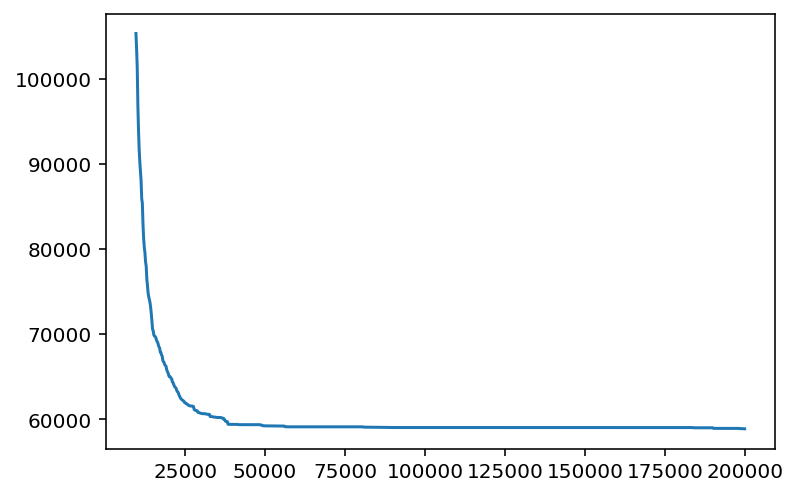

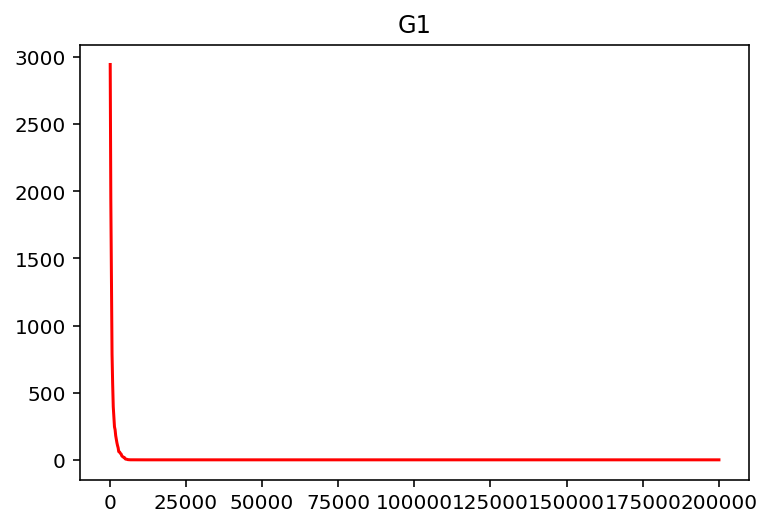

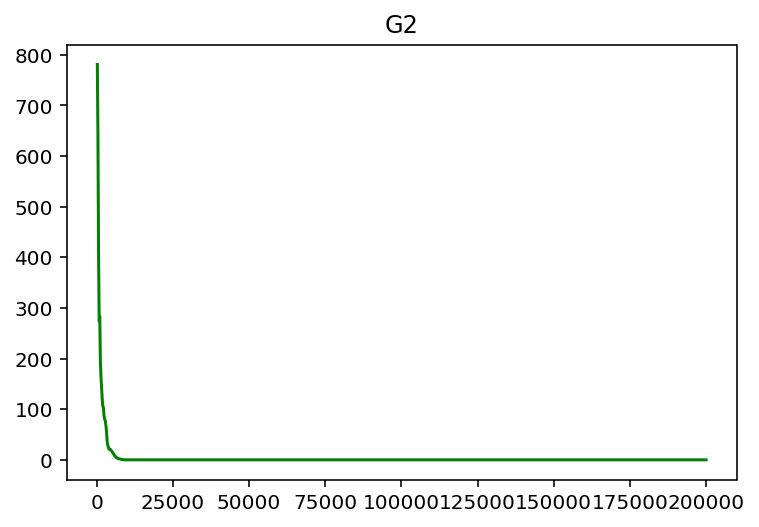

In [19]:
plt.plot(evals[feas:], F[feas:], label="F")
#plt.yscale("log")
plt.show()

plt.title("G1")
plt.plot(evals, G1, color="red")
plt.show()

plt.title("G2")
plt.plot(evals, G2, color="green")
plt.show()


